<a href="https://colab.research.google.com/github/drtayfunkok/My-Machine-Learning-Projects/blob/main/ML_Capstone_Project%20(Fraud_Detection)_Tayfun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;"> ML Classification Capstone Project</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Fraud Detection</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:100%; text-align:center; border-radius:10px 10px;">Tayfun Kok </p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Content</p>

* [INTRODUCTION](#0)
* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#1)
* [PART-01 (DATA CLEANING)](#2)
* [THE EXAMINATION OF COLUMNS](#3)    
* [THE END OF DATA CLEANING (PART - 01)](#4)

# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Importing Related Libraries </p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("drive/My Drive/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df1=df.copy()

## Review the dataset 

In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().any().any()

False

In [9]:
df.duplicated().sum()

1081

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


## Class analysis against other features

**Distribution of 1 & 0 in Class** 

In [12]:
df.Class.value_counts(normalize=True) #1:Fraud, 0:not Fraud

0    0.998333
1    0.001667
Name: Class, dtype: float64

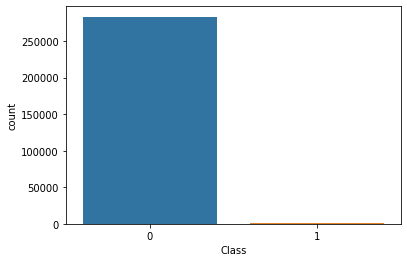

In [13]:
ax=sns.countplot(x=df.Class);

Only 473 (or 0.166%) of transactions are fraud, which means the dataset is highly unbalanced.

**Amount against to Class**

In [14]:
df[df["Class"]==1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

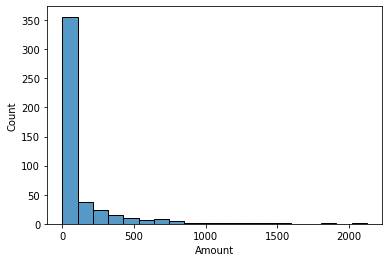

In [15]:
sns.histplot(df[df["Class"]==1].Amount, bins=20);

The amount of Fraud transaction is mostly distributed between 0 and 100.

In [16]:
df[df["Class"]==0].Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

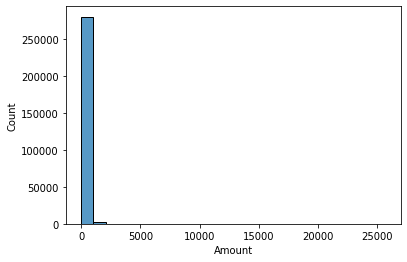

In [17]:
sns.histplot(df[df["Class"]==0].Amount, bins=25);

The amount of not Fraud transaction is mostly distributed between 0 and 1000

**Correlations of other features with Class**

In [18]:
df_corr=df.corr()["Class"].drop(index="Class").sort_values(ascending=False)
df_corr

V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

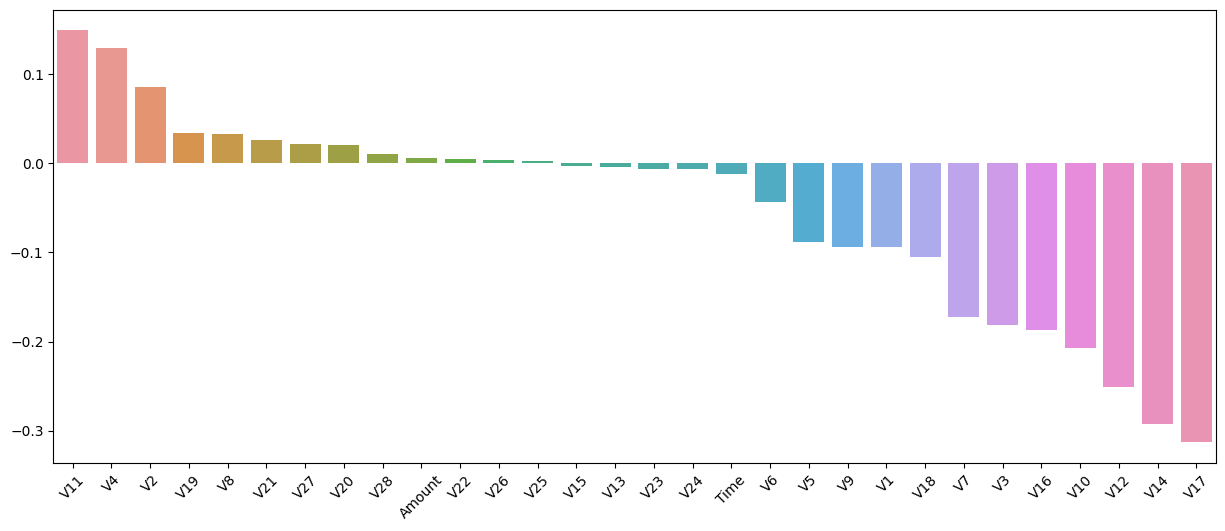

In [19]:
plt.figure(figsize = (15,6),dpi = 100)
ax=sns.barplot(x=df_corr.index, y=df_corr.values.round(3))
plt.xticks(rotation = 45);

In [20]:
features=df.columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], dtype='object')

In [21]:
def detect_outliers(data:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(data[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(data[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count
   

In [22]:
iqr=1.5
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 1.5*IQR after Logarithmed

6948 outliers in 'V1'
13390 outliers in 'V2'
3306 outliers in 'V3'
11094 outliers in 'V4'
12221 outliers in 'V5'
22886 outliers in 'V6'
8839 outliers in 'V7'
23904 outliers in 'V8'
8199 outliers in 'V9'
9345 outliers in 'V10'
735 outliers in 'V11'
15282 outliers in 'V12'
3362 outliers in 'V13'
14060 outliers in 'V14'
2884 outliers in 'V15'
8180 outliers in 'V16'
7353 outliers in 'V17'
7468 outliers in 'V18'
10150 outliers in 'V19'
27553 outliers in 'V20'
14401 outliers in 'V21'
1298 outliers in 'V22'
18467 outliers in 'V23'
4758 outliers in 'V24'
5333 outliers in 'V25'
5665 outliers in 'V26'
38799 outliers in 'V27'
30094 outliers in 'V28'
31685 outliers in 'Amount'
473 outliers in 'Class'

368132 OUTLIERS TOTALLY


# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Data Pre-Processing</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

**Splitting the dataset into the Training set and Test set**

In [24]:
X=df.drop(columns=["Class"])
y=df["Class"]

In [25]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [27]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (226980, 30)
Train target shape   :  (226980,)
Test features shape  :  (56746, 30)
Test target shape    :  (56746,)


# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Modelling and Model Performance</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**Related Libaries**

In [28]:
# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation & CV Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.pipeline import Pipeline


**User Defined Functions**

In [29]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Logistic Regression 

**Vanilla Logistic Model**

In [30]:
log_model=LogisticRegression(class_weight='balanced',random_state=42)
operations=[("scaler",StandardScaler()), ("model",log_model)]
log_pipe=Pipeline(steps=operations)
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [31]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[55263  1388]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221260   5342]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.06      0.93      0.12       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.55    226980
weighted avg       1.00      0.98      0.99    226980



**GridsearchCV for Logistic Regression**

In [32]:
parame= {
    "model__C": [1, 5, 10],
    'model__penalty': ["l1", "l2"],
    'model__solver': ['liblinear', 'lbfgs'],
}

In [33]:
log_model=LogisticRegression(class_weight='balanced',random_state=42)
operations=[("scaler",StandardScaler()), ("model",log_model)]
log_pipe=Pipeline(steps=operations)

In [34]:
log_grid=GridSearchCV(log_pipe, 
             parame,
             verbose=3,
             scoring="f1",
             n_jobs=-1, cv=5)

In [35]:
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [1, 5, 10], 'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'lbfgs']},
             scoring='f1', verbose=3)

In [36]:
log_grid.best_params_

{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

In [37]:
log_grid.best_score_

0.11298729571811494

In [38]:
eval_metric(log_grid, X_train, y_train, X_test, y_test)

Test_Set
[[55263  1388]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221260   5342]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.06      0.93      0.12       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.55    226980
weighted avg       1.00      0.98      0.99    226980



In [39]:
model_logistic=LogisticRegression(random_state=42)
operations=[("scaler",StandardScaler()), ("model",model_logistic)]
logistic_pipe=Pipeline(steps=operations)
logistic_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=42))])

In [40]:
eval_metric(logistic_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[56641    10]
 [   40    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226570     32]
 [   140    238]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.63      0.73       378

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.87    226980
weighted avg       1.00      1.00      1.00    226980



## Support Vector Machine (SVM)

**Vanilla SVM model**

In [41]:
svm_model=SVC(gamma="auto", random_state=42)
operations=[("scaler",StandardScaler()), ("model",svm_model)]
svm_pipe=Pipeline(steps=operations)
svm_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(gamma='auto', random_state=42))])

In [42]:
eval_metric(svm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[56650     1]
 [   40    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.98      0.58      0.73        95

    accuracy                           1.00     56746
   macro avg       0.99      0.79      0.86     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226596      6]
 [    60    318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.98      0.84      0.91       378

    accuracy                           1.00    226980
   macro avg       0.99      0.92      0.95    226980
weighted avg       1.00      1.00      1.00    226980



## K-nearest neighbors (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model_knn=KNeighborsClassifier()
operations=[("scaler",StandardScaler()), ("model",model_knn)]
knn_pipe=Pipeline(steps=operations)
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [ ]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

## Random Forest

In [ ]:
model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(X_train,y_train)

In [ ]:
eval_metric(model_rf, X_train, y_train, X_test, y_test)

**Grid Search**

In [ ]:
model_rf=RandomForestClassifier(random_state=74, class_weight="balanced")

In [ ]:
param_grid = {"n_estimators":[50,100, 150,200],
              "max_depth": [4,5,6],}

In [ ]:
grid_rf=GridSearchCV(estimator=model_rf,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=5,
                          n_jobs = -1)

In [ ]:
grid_rf.fit(X_train,y_train)

In [ ]:
grid_rf.best_params_

In [ ]:
grid_rf.best_score_

In [ ]:
eval_metric(grid_rf, X_train, y_train, X_test, y_test)

## AdaBoost

In [ ]:
model_ada=AdaBoostClassifier(random_state=42)
model_ada.fit(X_train,y_train)

In [ ]:
eval_metric(model_ada, X_train, y_train, X_test, y_test)

## Gradient Boosting

In [ ]:
model_gb=GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train,y_train)

In [ ]:
eval_metric(model_gb, X_train, y_train, X_test, y_test)

## XGBoost

In [ ]:
xgb_model=XGBClassifier(random_state=74,max_depth=2, subsample=0.8,
                        colsample_bytree=0.9, silent=True)

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred=xgb_model.predict(X_test)

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

In [ ]:
xgb_model.fit(X_train,y_train, sample_weight=classes_weights)

In [ ]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

In [ ]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              }

In [ ]:
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_score, 
                              n_jobs = -1, 
                              verbose = 2)

In [ ]:
xgb_grid_model.fit(X_train, y_train, sample_weight=classes_weights)

In [ ]:
xgb_grid_model.best_params_

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)